# DataFrame 3: Episodios y muertes
Lista episodios y muertes

Ratings episodios

In [2]:
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_epi_deaths = pd.read_csv('../data/episodios_y_muertes.csv')
df_epi_deaths

,Season,Episode Number,Number in Season,Episode Name,Director,Writer,Original Air Date,US viewers (million),Runtime (mins),IMDB Description,IMDB votes,Imdb Rating,Notable Death Count
0,1,1,1,Winter Is Coming,Tim Van Patten,David Benioff & D. B. Weiss,"April 17, 2011",2.22,62,"Jon Arryn, the Hand of the King, is dead. King...",27685,9.0,4
1,1,2,2,The Kingsroad,Tim Van Patten,David Benioff & D. B. Weiss,"April 24, 2011",2.20,56,"While Bran recovers from his fall, Ned takes o...",21256,8.8,3
2,1,3,3,Lord Snow,Brian Kirk,David Benioff & D. B. Weiss,"May 1, 2011",2.44,58,Lord Stark and his daughters arrive at King's ...,20090,8.7,0
3,1,4,4,"Cripples, Bastards, and Broken Things",Brian Kirk,Bryan Cogman,"May 8, 2011",2.45,56,Eddard investigates Jon Arryn's murder. Jon be...,19123,8.8,1
4,1,5,5,The Wolf and the Lion,Brian Kirk,David Benioff & D. B. Weiss,"May 15, 2011",2.58,55,Catelyn has captured Tyrion and plans to bring...,20062,9.1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,8,69,2,A Knight of the Seven Kingdoms,David Nutter,Bryan Cogman,"April 21, 2019",10.29,58,Jaime faces judgment and Winterfell prepares f...,118605,7.9,0
69,8,70,3,The Long Night,Miguel Sapochnik,David Benioff & D. B. Weiss,"April 28, 2019",12.02,82,The Night King and his army have arrived at Wi...,198482,7.5,7
70,8,71,4,The Last of the Starks,David Nutter,David Benioff & D. B. Weiss,"May 5, 2019",11.80,78,The Battle of Winterfell is over and a new cha...,151229,5.5,2
71,8,72,5,The Bells,Miguel Sapochnik,David Benioff & D. B. Weiss,"May 12, 2019",12.40,78,Forces have arrived at King's Landing for the ...,176140,6.0,7


In [4]:
df_epi_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Season                73 non-null     int64  
 1   Episode Number        73 non-null     int64  
 2   Number in Season      73 non-null     int64  
 3   Episode Name          73 non-null     object 
 4   Director              73 non-null     object 
 5   Writer                73 non-null     object 
 6   Original Air Date     73 non-null     object 
 7   US viewers (million)  73 non-null     float64
 8   Runtime (mins)        73 non-null     int64  
 9   IMDB Description      73 non-null     object 
 10  IMDB votes            73 non-null     int64  
 11  Imdb Rating           73 non-null     float64
 12  Notable Death Count   73 non-null     int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 7.5+ KB


Voy a eliminar las columnas con muchos nulos y las columnas que no me interesan para el EDA:

In [5]:
df_epi_deaths_clean = df_epi_deaths.drop(["Director","Writer","Original Air Date","IMDB Description"], axis=1)
df_epi_deaths_clean

,Season,Episode Number,Number in Season,Episode Name,US viewers (million),Runtime (mins),IMDB votes,Imdb Rating,Notable Death Count
0,1,1,1,Winter Is Coming,2.22,62,27685,9.0,4
1,1,2,2,The Kingsroad,2.20,56,21256,8.8,3
2,1,3,3,Lord Snow,2.44,58,20090,8.7,0
3,1,4,4,"Cripples, Bastards, and Broken Things",2.45,56,19123,8.8,1
4,1,5,5,The Wolf and the Lion,2.58,55,20062,9.1,5
...,...,...,...,...,...,...,...,...,...
68,8,69,2,A Knight of the Seven Kingdoms,10.29,58,118605,7.9,0
69,8,70,3,The Long Night,12.02,82,198482,7.5,7
70,8,71,4,The Last of the Starks,11.80,78,151229,5.5,2
71,8,72,5,The Bells,12.40,78,176140,6.0,7


In [6]:
df_epi_deaths_clean.to_csv("../data_clean/df_epi_deaths_clean.csv", index=False)

In [7]:
# EN OTRO SALEN 6, algunos son entre varios...
df_epi_deaths["Writer"].unique()


array(['David Benioff\xa0&\xa0D. B. Weiss', 'David Benioff & D. B. Weiss',
       'Bryan Cogman',
       'Story by\u200a: Jane Espenson\xa0and David Benioff & D. B. Weiss\xa0',
       'George R. R. Martin', 'Vanessa Taylor',
       'David Benioff\xa0& D. B. Weiss', 'Dave Hill'], dtype=object)

In [8]:
df_epi_deaths["Director"].nunique()

20

grafica correlacion (cuadricula colorine) major deaths y uno de los ratings (o media de estos)

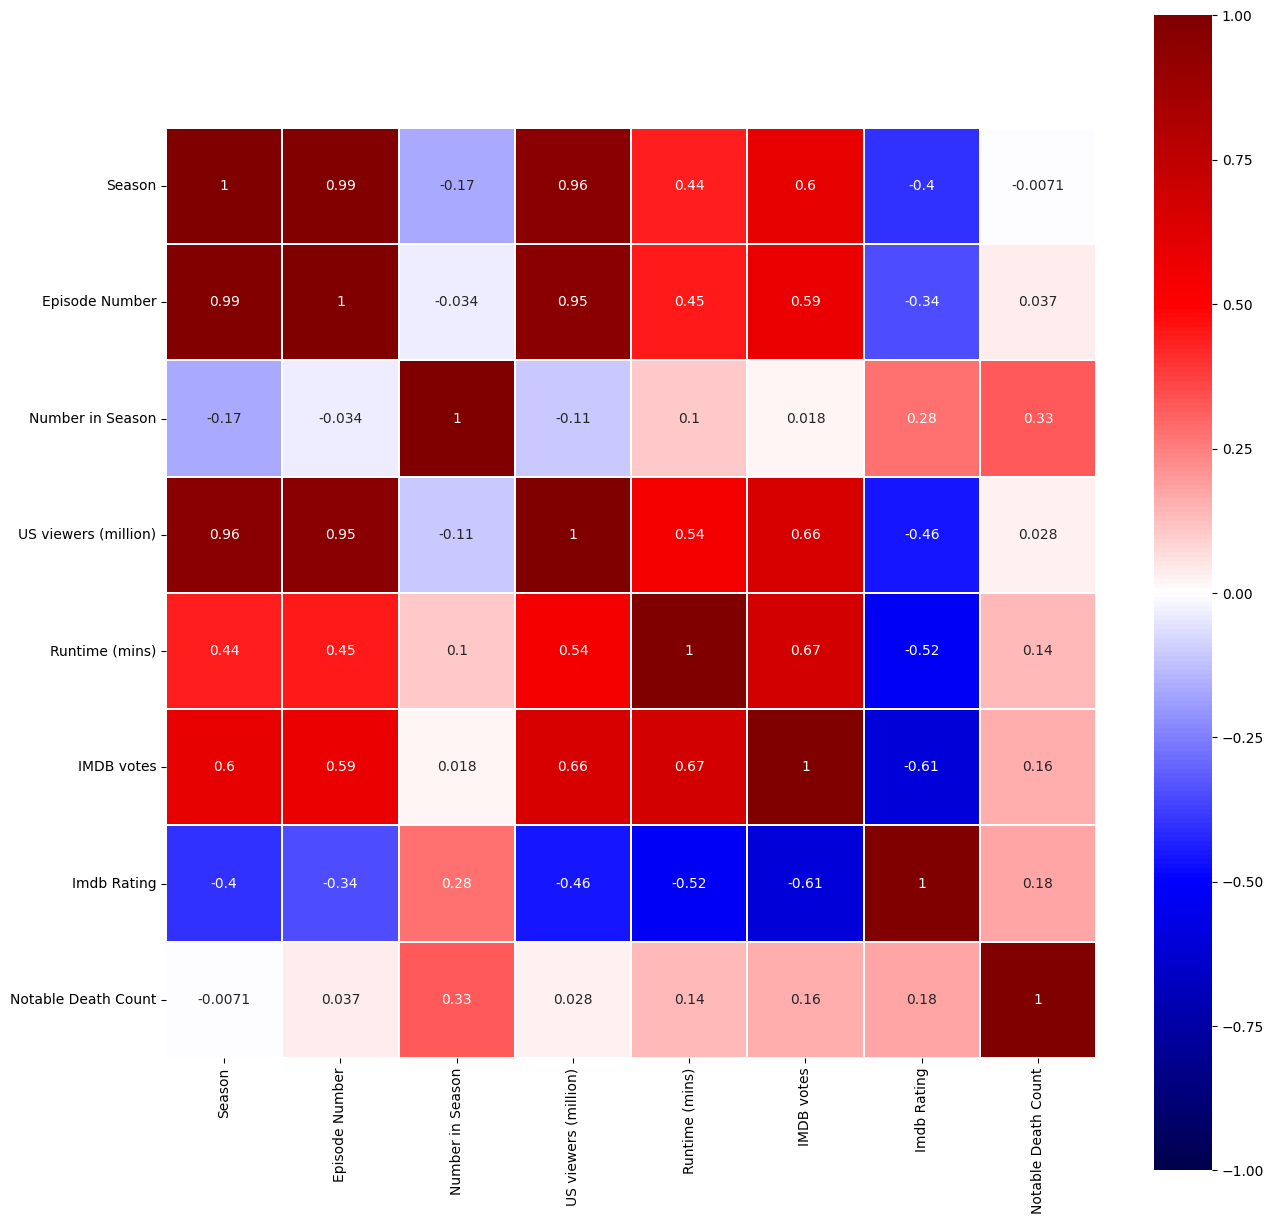

In [10]:
corr = df_epi_deaths_clean.select_dtypes(include='number').corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr,
            vmin=-1,
            vmax=1,
            cmap="seismic",
            square=True,
            linewidths=.1,
            annot=True);

**CORRELACIONES:**

**directas:** a más x, más y: 

number in season con notable death count: hay más muertes importantes hacia el final de las temporadas. Los finales de temporada están mejor valorados (number in season con imdb rating) aunque vota y lo ve menos gente??? tb duran menos los episodios segun se acaba la temporada???. AUmenta algo la valoración de los episodios con las muertes importantes y bajan los espectadores.

**inversas:** a más x, menos y: 

season con death count y season con imdc rating. Según avanzan las temporadas, el nº de muertes notables disminuye y también la valoración del público (a pesar de que más gente vote y lo vea). los capítulos más largos están peor valorados